# CODSOFT TASK 4

## SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
sales = pd.read_csv("advertising.csv")

In [ ]:
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [ ]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

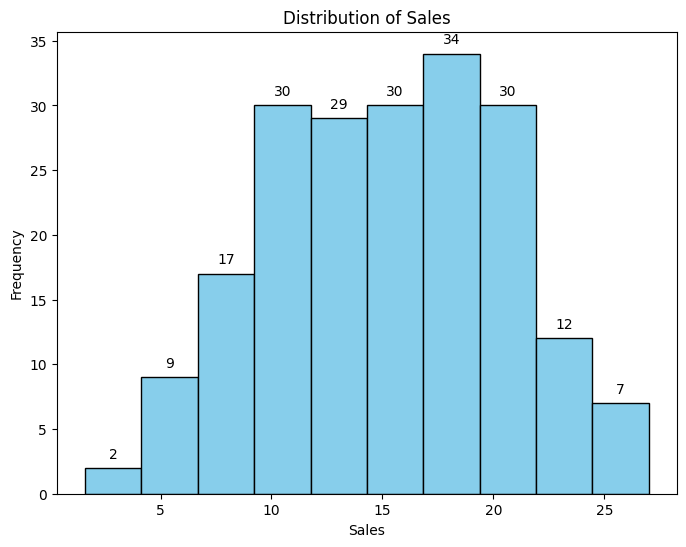

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a pandas DataFrame called 'sales' with a 'Sales' column
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Create the histogram
counts, bins, patches = plt.hist(sales['Sales'], bins=10, color='skyblue', edgecolor='black')

# Calculate bin centers
bin_centers = 0.5 * np.diff(bins) + bins[:-1]

# Add count labels to the bars
for count, bin_center in zip(counts, bin_centers):
    plt.annotate(str(int(count)), xy=(bin_center, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.show()  # Display the plot

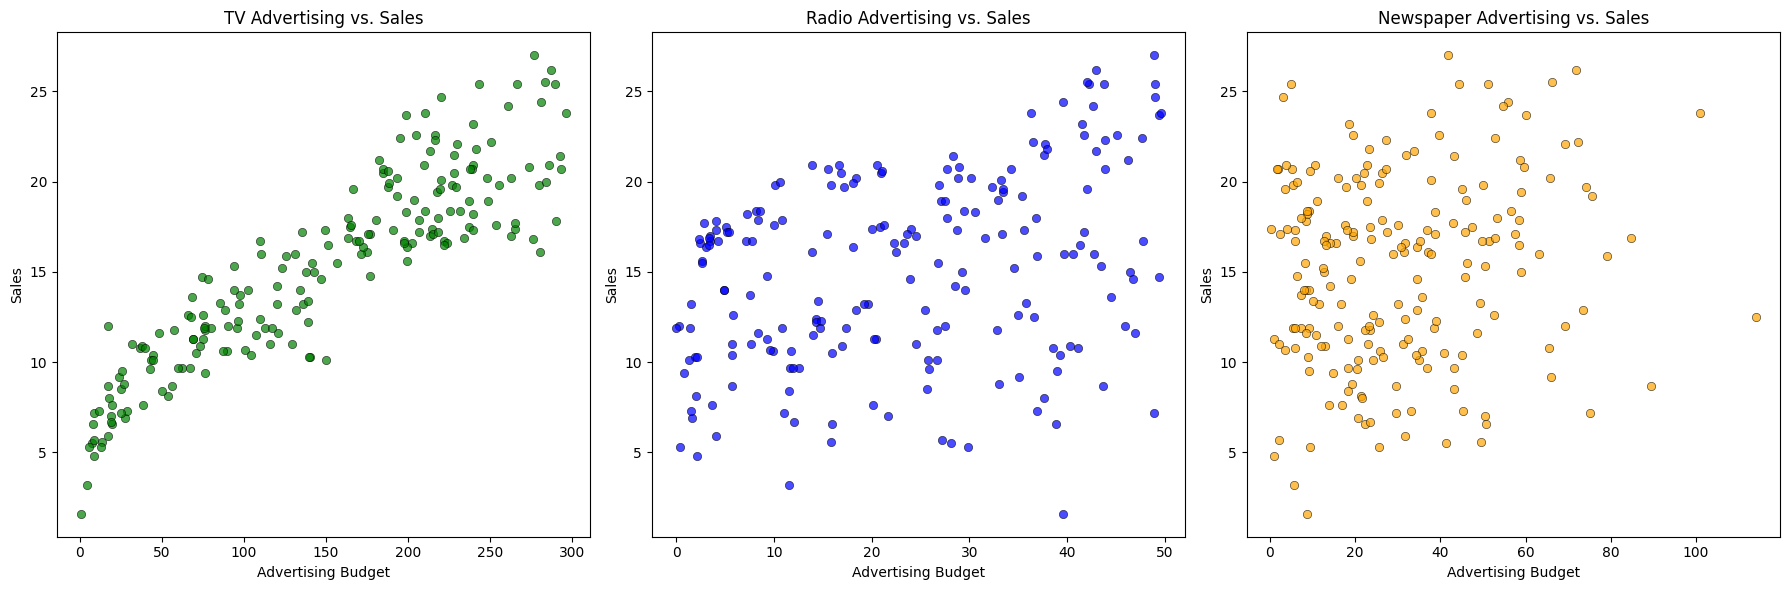

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for TV data (subplot 1)
sns.scatterplot(data=sales, x='TV', y='Sales', color='green', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('TV Advertising vs. Sales')

# Scatter plot for Radio data (subplot 2)
sns.scatterplot(data=sales, x='Radio', y='Sales', color='blue', edgecolor='black', alpha=0.7, ax=axes[1])
axes[1].set_title('Radio Advertising vs. Sales')

# Scatter plot for Newspaper data (subplot 3)
sns.scatterplot(data=sales, x='Newspaper', y='Sales', color='orange', edgecolor='black', alpha=0.7, ax=axes[2])
axes[2].set_title('Newspaper Advertising vs. Sales')

# Set common labels for all subplots
for ax in axes:
    ax.set_xlabel('Advertising Budget')
    ax.set_ylabel('Sales')

plt.tight_layout()  # Adjust subplot spacing

plt.show()  # Display the subplots

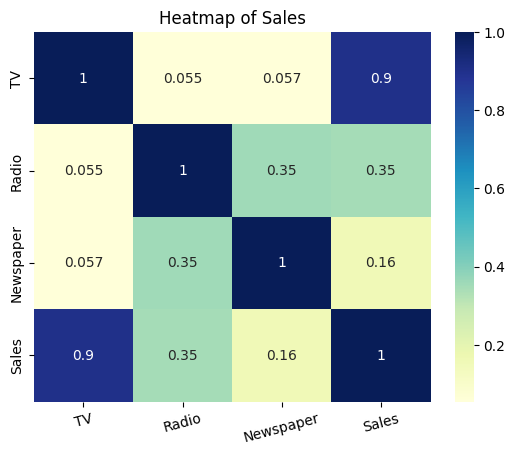

In [ ]:
# Create the heatmap
sns.heatmap(sales.corr(),  annot=True, cmap='YlGnBu')

# Customize the plot (optional)
plt.xticks(rotation=15)
plt.title("Heatmap of Sales")

# Display the plot
plt.show()

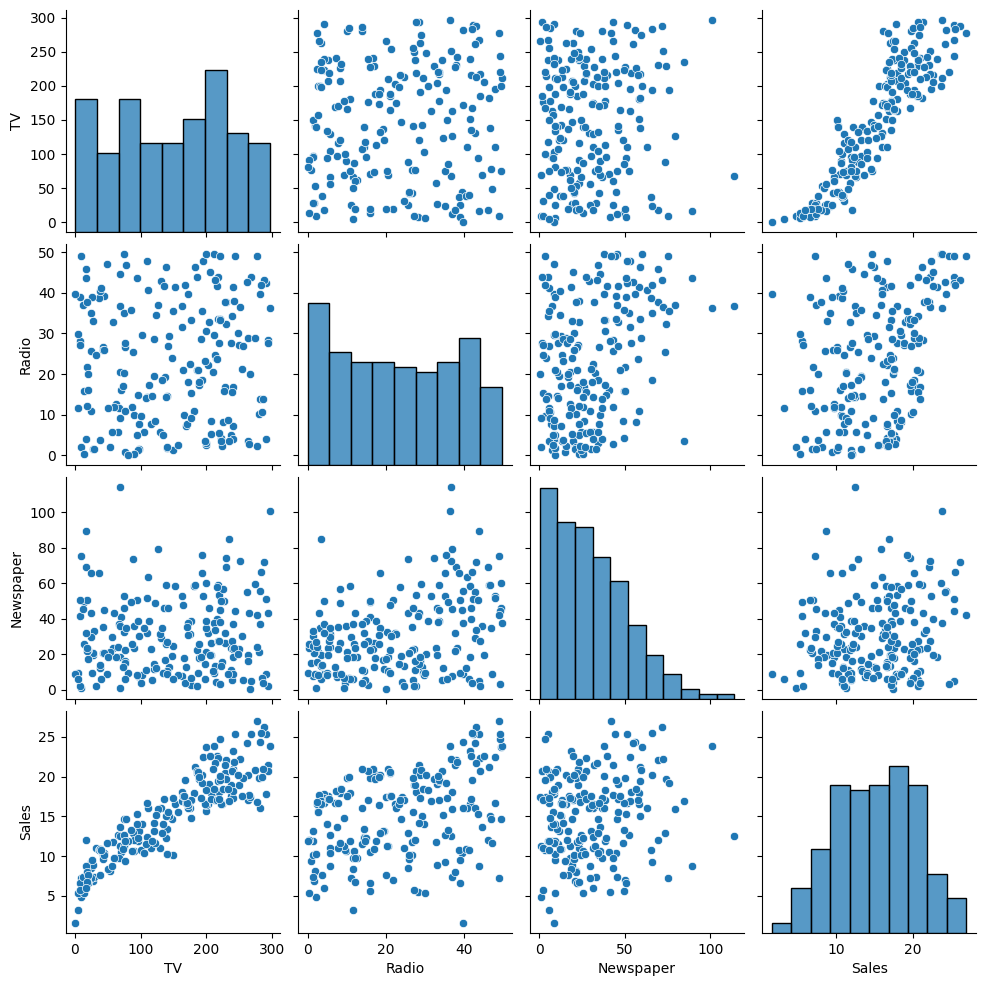

In [ ]:
# Create a pairplot
sns.pairplot(sales)

# Show the plot
plt.show()

In [ ]:
sales['Total Advert'] = sales['TV'] + sales['Radio'] + sales['Newspaper']
sales

,TV,Radio,Newspaper,Sales,Total Advert
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [ ]:
# Importing the libraries needed for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from tabulate import tabulate

In [ ]:
# Assigning the features and prediction columns to the X and y columns
X = sales.drop(columns='Sales')
y = sales['Sales']

In [ ]:
# Splitting the the sales dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Defining the models needed for the predictions
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0)
}

In [ ]:
# Models training and evaluation metrics
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append([name, mse, rmse, mae, r2])
    return results

In [ ]:
# Train and evaluate each model
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Create a tabular representation of results
table = tabulate(results, headers=['The Models', 'MSE', 'RMSE', 'MAE', 'R2'], tablefmt='grid')
print(table)

+-------------------+---------+---------+---------+----------+
| The Models        |     MSE |    RMSE |     MAE |       R2 |
+===================+=========+=========+=========+==========+
| Linear Regression | 2.90776 | 1.70521 | 1.27483 | 0.905901 |
+-------------------+---------+---------+---------+----------+
| SVR               | 3.74541 | 1.93531 | 1.54246 | 0.878794 |
+-------------------+---------+---------+---------+----------+
| Gradient Boosting | 2.23788 | 1.49595 | 1.09092 | 0.927579 |
+-------------------+---------+---------+---------+----------+
| Lasso             | 3.03567 | 1.74232 | 1.30263 | 0.901762 |
+-------------------+---------+---------+---------+----------+
| Ridge             | 2.90779 | 1.70523 | 1.27483 | 0.9059   |
+-------------------+---------+---------+---------+----------+


In [ ]:
#Importing random library
import random
random.seed(42)
random_samples = sales[['TV','Radio','Newspaper']].sample(10)
random_samples

,TV,Radio,Newspaper
46,89.7,9.9,35.7
154,187.8,21.1,9.5
117,76.4,0.8,14.8
53,182.6,46.2,58.7
84,213.5,43.0,33.8
74,213.4,24.6,13.1
44,25.1,25.7,43.3
97,184.9,21.0,22.0
30,292.9,28.3,43.2
134,36.9,38.6,65.6


In [ ]:
random_samples['Total Advert'] = random_samples['TV'] + random_samples['Radio'] + random_samples['Newspaper']
random_samples

,TV,Radio,Newspaper,Total Advert
46,89.7,9.9,35.7,135.3
154,187.8,21.1,9.5,218.4
117,76.4,0.8,14.8,92.0
53,182.6,46.2,58.7,287.5
84,213.5,43.0,33.8,290.3
74,213.4,24.6,13.1,251.1
44,25.1,25.7,43.3,94.1
97,184.9,21.0,22.0,227.9
30,292.9,28.3,43.2,364.4
134,36.9,38.6,65.6,141.1


In [ ]:
# Select 10 random samples from the dataset
random_samples = sales.sample(n=10, random_state=np.random.RandomState())

# Prepare the data for prediction (excluding the 'Sales' column)
X_random_samples = random_samples.drop(columns='Sales')

# Actual sales values
actual_sales = random_samples['Sales'].values

# Make predictions with each model and store them in a list
predictions_table = []
for name, model in models.items():
    predicted_sales = model.predict(X_random_samples)
    for i in range(len(predicted_sales)):
        variance = actual_sales[i] - predicted_sales[i]
        predictions_table.append([name, i+1, actual_sales[i], predicted_sales[i], variance])

In [ ]:
# Create a tabular representation of model, sample number, actual vs predicted values, and variance
headers = ['Model', 'Sample No.', 'Actual Sales', 'Predicted Sales', 'Variance']
table = tabulate(predictions_table, headers=headers, tablefmt='grid')

# Display the table
print("Table of the Models Used and their Performance:")
print(table)

Table of the Models Used and their Performance:
+-------------------+--------------+----------------+-------------------+--------------+
| Model             |   Sample No. |   Actual Sales |   Predicted Sales |     Variance |
+===================+==============+================+===================+==============+
| Linear Regression |            1 |           11.6 |          12.3689  | -0.768884    |
+-------------------+--------------+----------------+-------------------+--------------+
| Linear Regression |            2 |           14.7 |          13.9709  |  0.729145    |
+-------------------+--------------+----------------+-------------------+--------------+
| Linear Regression |            3 |           24.7 |          21.6827  |  3.01728     |
+-------------------+--------------+----------------+-------------------+--------------+
| Linear Regression |            4 |           14   |          10.3787  |  3.62134     |
+-------------------+--------------+----------------+---------

In [ ]:
# Make predictions with each model and calculate the variance
model_variances = {}
for name, model in models.items():
    predicted_sales = model.predict(X_random_samples)
    variance = actual_sales - predicted_sales
    model_variances[name] = np.sum(variance)

# Create a tabular representation of model and sum of variances
variance_table = [[name, np.sum(var)] for name, var in model_variances.items()]
headers = ['Models', 'Sum of Variance']
table = tabulate(variance_table, headers=headers, tablefmt='grid')

# Display the table
print("Table of Sum of Variance per Model:")
print(table)

Table of Sum of Variance per Model:
+-------------------+-------------------+
| Models            |   Sum of Variance |
+===================+===================+
| Linear Regression |          5.13078  |
+-------------------+-------------------+
| SVR               |          5.48411  |
+-------------------+-------------------+
| Gradient Boosting |         -0.315974 |
+-------------------+-------------------+
| Lasso             |          5.18313  |
+-------------------+-------------------+
| Ridge             |          5.13081  |
+-------------------+-------------------+
